# Introduction to K-Nearest Neighbours 

# Representing Points

## Euclidean Distance

In [2]:
#example of euclidean distance
def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

print(euclidean_distance([1, 2], [4, 0]))
print(euclidean_distance([5, 4, 3], [1, 7, 9]))

3.605551275463989
7.810249675906654


## Manhattan Distance

In [3]:
#example of manhattan distance
def manhattan_distance(pt1,pt2):
  distance=0;
  for i in range(len(pt1)):
    distance += abs(pt1[i] - pt2[i])
  return distance

print(manhattan_distance([1, 2], [4, 0]))
print(manhattan_distance([5, 4, 3], [1, 7, 9]))

5
13


## Hamming Distance

In [5]:
#example of hamming distance
def hamming_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    if pt1[i] != pt2[i]:
      distance += 1
  return distance

print(hamming_distance([1, 2], [1, 100]))
print(hamming_distance([5, 4, 9], [1, 7, 9]))

1
2


## Scipy library-distance calculation function

In [6]:
#example of both ours and scipy lib
from scipy.spatial import distance

def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

def manhattan_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += abs(pt1[i] - pt2[i])
  return distance

def hamming_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    if pt1[i] != pt2[i]:
      distance += 1
  return distance

print(euclidean_distance([1, 2], [4, 0]))
print(manhattan_distance([1, 2], [4, 0]))
print(hamming_distance([5, 4, 9], [1, 7, 9]))

print(distance.euclidean([1, 2], [4, 0]))
print(distance.cityblock([1, 2], [4, 0]))
print(distance.hamming([5, 4, 9], [1, 7, 9]))#here we see difference in answer from scipy lib

3.605551275463989
5
2
3.605551275463989
5
0.6666666666666666


# Normalization

## Training set vs validating set vs test set

# K-Nearest Neighbours Classifier

## Introduction

## Distance between 2 points in 2D space

In [7]:
#example of classification in 2d
star_wars = [125, 1977]
raiders = [115, 1981]
mean_girls = [97, 2004]

def distance(movie1, movie2):#normal euvlidean distance found 
  length_difference = (movie1[0] - movie2[0]) ** 2
  year_difference = (movie1[1] - movie2[1]) ** 2
  distance = (length_difference + year_difference) ** 0.5
  return distance

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))#more similar stars wars will be to most closer it is in distance

10.770329614269007
38.897300677553446


## Distance between 2 points in 3D space

In [8]:
#example of classification in 3d
star_wars = [125, 1977, 11000000]
raiders = [115, 1981, 18000000]
mean_girls = [97, 2004, 17000000]

def distance(movie1, movie2):#(this formula can be used for any number of dimension)
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

print(distance(star_wars, raiders))
print(distance(star_wars, mean_girls))#so again taking any number of dimesnion we can find the distance between them and classify

7000000.000008286
6000000.000126083


## step1-Normalize the data

In [9]:
#example of using normalizing of data using min_max_nomalize
release_dates = [1897.0, 1998.0, 2000.0, 1948.0, 1962.0, 1950.0, 1975.0, 1960.0, 2017.0, 1937.0, 1968.0, 1996.0, 1944.0, 1891.0, 1995.0, 1948.0, 2011.0, 1965.0, 1891.0, 1978.0]
#for our function the data type is float of all 
def min_max_normalize(lst):
  minimum = min(lst)
  maximum = max(lst)
  normalized = []
  
  for value in lst:
    normalized_num = (value - minimum) / (maximum - minimum)
    normalized.append(normalized_num)
  
  return normalized

print(min_max_normalize(release_dates))

[0.047619047619047616, 0.8492063492063492, 0.8650793650793651, 0.4523809523809524, 0.5634920634920635, 0.46825396825396826, 0.6666666666666666, 0.5476190476190477, 1.0, 0.36507936507936506, 0.6111111111111112, 0.8333333333333334, 0.42063492063492064, 0.0, 0.8253968253968254, 0.4523809523809524, 0.9523809523809523, 0.5873015873015873, 0.0, 0.6904761904761905]


## Step-2-Finding the Nearest Neighbour

In [ ]:
from movies import movie_dataset, movie_labels

#print(movie_dataset['Bruce Almighty'])
#print(movie_labels['Bruce Almighty'])

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, k):#k is the number of nearest neighbors(discussed further)
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  return neighbors
  
print(classify([.4, .2, .9], movie_dataset, 5))
#so what we do is we pass the unknown ka to function and we pass the dataset and k,then each distance is calculated with all movies and appended to distances list with the distance and also the name then we sort and return only k movies so when we pass any point we get the closest k movies to that point 

In [ ]:
#output will be
Output:
[[0.08273614694606074, 'Lady Vengeance'], 
 [0.22989623153818367, 'Steamboy'], [0.23641372358159884, 'Fateless'],
 [0.26735445689589943, 'Princess Mononoke'],
 [0.3311022951533416, 'Godzilla 2000']]

## Step-3-Classifying by counting the nearest neighbors

In [ ]:
#complete code for classification
from movies import movie_dataset, movie_labels

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset,labels, k):
  distances = []
  
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for movie in neighbors:
    title=movie[1]
    if labels[title]==0:
      num_bad+=1
    else:
      num_good+=1
    if(num_good > num_bad):
      return 1
    else:
      return 0
print(classify([.4, .2, .9],movie_dataset,movie_labels,5))#output is 1(good)
#so once neighbors got we take the title of each neigbour and check if it is good or bad from labels and increment count of good and bad and finally based on good and bad we classify if tie(we can see first movi ine neighbour which is nearest ka good or bad and classify based on that)

In [ ]:
from movies import movie_dataset, movie_labels, normalize_point

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance


def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0

#print("Call Me By Your Name" in movie_dataset)
my_movie=[3500000, 132, 2017]
normalized_my_movie=normalize_point(my_movie)
print(classify(normalized_my_movie, movie_dataset, movie_labels, 5))#output is 1(good)
#so to make our own movie we first see in datset(if there on neigbour itself so shd not) once not then make a list of all for function and normalize using function and see

## Training and Validation

In [ ]:
#doing it for only one movie from validation set and checking
from movies import training_set, training_labels, validation_set, validation_labels

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0
#print(validation_set["Bee Movie"])
#print(validation_labels["Bee Movie"])
guess=classify(validation_set["Bee Movie"],training_set,training_labels,5)
if guess==validation_labels["Bee Movie"]:
  print("Correct!")
else:
  print("Wrong")#output is correct(means both prediction and actual are same)
#like this we need to do for complete validation set

## Choosing k

In [ ]:
#a function to validating accuracy
from movies import training_set, training_labels, validation_set, validation_labels

def distance(movie1, movie2):
  squared_difference = 0
  for i in range(len(movie1)):
    squared_difference += (movie1[i] - movie2[i]) ** 2
  final_distance = squared_difference ** 0.5
  return final_distance

def classify(unknown, dataset, labels, k):
  distances = []
  #Looping through all points in the dataset
  for title in dataset:
    movie = dataset[title]
    distance_to_point = distance(movie, unknown)
    #Adding the distance and point associated with that distance
    distances.append([distance_to_point, title])
  distances.sort()
  #Taking only the k closest points
  neighbors = distances[0:k]
  num_good = 0
  num_bad = 0
  for neighbor in neighbors:
    title = neighbor[1]
    if labels[title] == 0:
      num_bad += 1
    elif labels[title] == 1:
      num_good += 1
  if num_good > num_bad:
    return 1
  else:
    return 0
  
def find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, k):
  num_correct = 0.0
  for title in validation_set:
    guess = classify(validation_set[title], training_set, training_labels, k)
    if guess == validation_labels[title]:
      num_correct += 1
  return num_correct / len(validation_set)


print(find_validation_accuracy(training_set, training_labels, validation_set, validation_labels, 3))#output is 66%(0.66)
#so in validating for each movie in validation_set we guess from our function and check if it is correct or not and if correct adding and finally getting the accuracy

# Using Sklearn for KNN

In [ ]:
#example of how to do using sklearn
from movies import movie_dataset, labels
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(movie_dataset, labels)
guess = classifier.predict([[.45, .2, .5], [.25, .8, .9],[.1, .1, .9]])#see how passed when predicting
print(guess)#got [1,1,0]

!!!IMPORTANT!!
Learn how accuracy of this and all checking
see how to do it
accuracy_score and others can we put and all

# DO ONE PROJECT--SEE CANCER DETECTION(if we can)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("Cancer_detection_KNN.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [6]:
df=df.iloc[:,0:32]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [19]:
def scale(df):
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

df=scale(X)

In [20]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [21]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=42)

In [24]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

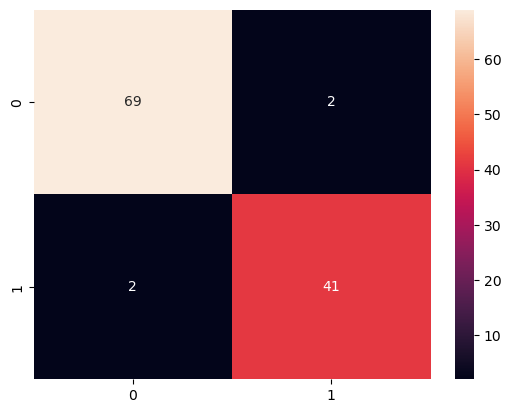

In [28]:
sns.heatmap(cm,annot=True)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9649122807017544

Good accuracy seen